Feature Entropy and Information Gain:

Pregnancies - Entropy: 3.482, Information Gain: 0.062
Glucose - Entropy: 6.751, Information Gain: 0.304
BloodPressure - Entropy: 4.792, Information Gain: 0.059
SkinThickness - Entropy: 4.586, Information Gain: 0.082
Insulin - Entropy: 4.682, Information Gain: 0.277
BMI - Entropy: 7.594, Information Gain: 0.344
DiabetesPedigreeFunction - Entropy: 8.829, Information Gain: 0.651
Age - Entropy: 5.029, Information Gain: 0.141

Feature with highest information gain: DiabetesPedigreeFunction (0.651)
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

Model Accuracy: 0.766


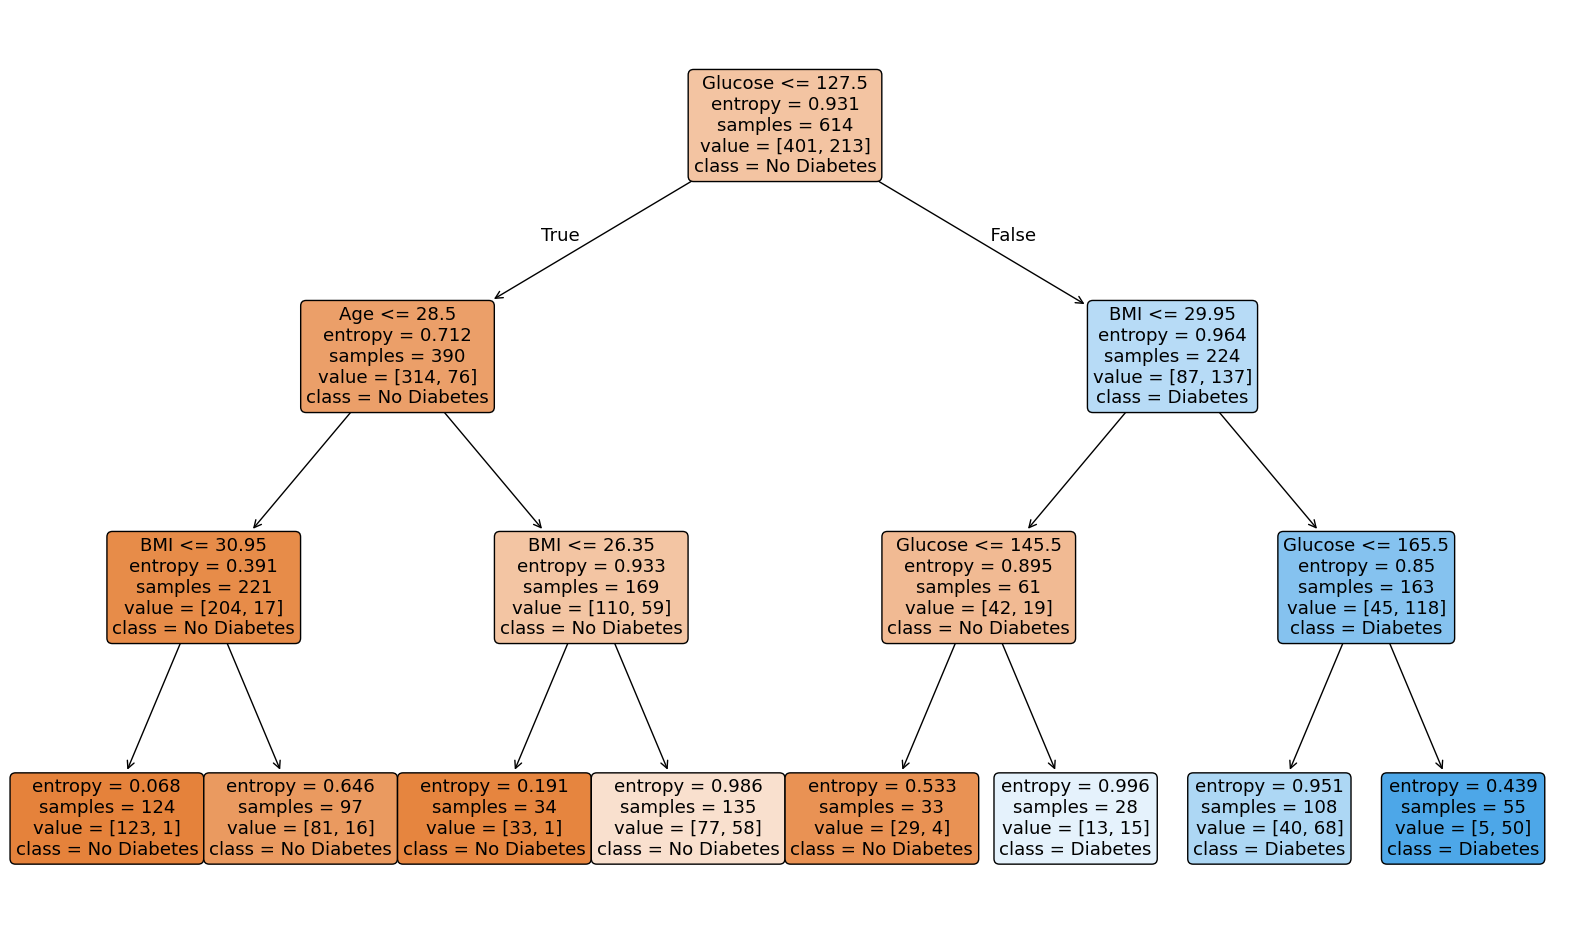

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import seaborn as sns
df = pd.read_csv(r"C:\Users\santhosh\Downloads\diabetes.csv")
def calculate_entropy(data, target_column):
    total_rows = len(data)
    target_values = data[target_column].unique()
    entropy = 0
    for value in target_values:
        value_count = len(data[data[target_column] == value])
        proportion = value_count / total_rows
        if proportion > 0:
            entropy -= proportion * math.log2(proportion)
    return entropy
def calculate_information_gain(data, feature, target_column):
    unique_values = data[feature].unique()
    weighted_entropy = 0
    for value in unique_values:
        subset = data[data[feature] == value]
        proportion = len(subset) / len(data)
        weighted_entropy += proportion * calculate_entropy(subset, target_column)
    return calculate_entropy(data, target_column) - weighted_entropy
info_gains = {}
print("Feature Entropy and Information Gain:\n")
for column in df.columns[:-1]:
    entropy = calculate_entropy(df, column)
    information_gain = calculate_information_gain(df, column, 'Outcome')
    info_gains[column] = information_gain
    print(f"{column} - Entropy: {entropy:.3f}, Information Gain: {information_gain:.3f}")
best_feature = max(info_gains, key=info_gains.get)
print(f"\nFeature with highest information gain: {best_feature} ({info_gains[best_feature]:.3f})")
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
id3_tree = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)
id3_tree.fit(X_train, y_train)
y_pred = id3_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.3f}")
plt.figure(figsize=(20, 12))
plot_tree(id3_tree, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True)
plt.show()